<a href="https://colab.research.google.com/github/gabrielmvsantos/Test3/blob/main/An%C3%A1lise_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise dados 05/07/22**

---



<h2> Importanto Libs <h2>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import scipy as sp

#Read Data



*   Carregando e armazenando o dataset no objeto 'df'





In [ ]:
df = pd.read_excel("/content/drive/MyDrive/base dados.xlsx")

In [ ]:
df.head(5)

,USER_ID,MSG_DT,rk,MESSAGE_RECEIVE,MESSAGE_SEND,INTENT,intent_new,msg_err,label,Nota_Label,Label_post,Nota_Label_post,segment_n,SUBSCRIPTION_CD
0,12049600690,2022-07-05 17:24:41.4380000,1,Boa noite,Certo! Vi que você não possui um plano de celu...,intent.welcome,intent.welcome,0,NaN,NaN,NaN,NaN,NaN,NaN
1,12145426632,2022-07-05 11:36:31.8120000,1,Oi,Certo! Vi que você não possui um plano de celu...,intent.welcome,intent.welcome,0,NaN,NaN,NaN,NaN,NaN,NaN
2,12233229946,2022-07-05 12:35:14.9910000,1,"Aura, fatura",Certo! Vi que você não possui um plano de celu...,intent.billing.check,intent.billing.check,0,NaN,NaN,NaN,NaN,NaN,NaN
3,13017322127,2022-07-05 17:25:48.5950000,1,Promoções,Certo! Vi que você não possui um plano de celu...,intent.activate.promotion,intent.activate.promotion,0,NaN,NaN,NaN,NaN,NaN,NaN
4,13054907921,2022-07-05 12:34:56.1820000,1,SMS Fatura em Aberto: Clique aqui para mais in...,Certo! Vi que você não possui um plano de celu...,intent.financial.receptive.greeting,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN


# Exploração dos Dados

Verificar:

---



1.   Quantidade de avaliações por nota
2.   Quantidade de avaliações por segmento
3.   Média de steps para as avaliações
4.   Média de steps até avaliação
5.   Quantidade de erros
6.   Avaliação por erro na jornada
7.   Top 10 Users com mais steps



In [ ]:
#0. Verificando o formato de cada coluna

df.dtypes.to_frame()

,0
USER_ID,int64
MSG_DT,object
rk,int64
MESSAGE_RECEIVE,object
MESSAGE_SEND,object
INTENT,object
intent_new,object
msg_err,int64
label,object
Nota_Label,float64


In [ ]:
df.shape

(953679, 14)

In [ ]:
#1. Verificando quantidade de avaliações por nota

notas = pd.DataFrame({'Nota':df['label'].value_counts(),
                      '%T':round(df['label'].value_counts(normalize=True)*100,2)})
notas

,Nota,%T
5. Adorei,12054,27.88
1. Não me ajudou,11149,25.79
4. Gostei,8915,20.62
Texto Livre,4916,11.37
3. Normal,3702,8.56
2. Não gostei,2501,5.78


In [ ]:
#3. Verificando quantidade de avaliações por segmento

df.groupby(['segment_n','label']).size().reset_index()

,segment_n,label,0
0,GOLD,1. Não me ajudou,382
1,GOLD,2. Não gostei,82
2,GOLD,3. Normal,117
3,GOLD,4. Gostei,273
4,GOLD,5. Adorei,359
5,GOLD,Texto Livre,122
6,PLATINUM,1. Não me ajudou,179
7,PLATINUM,2. Não gostei,28
8,PLATINUM,3. Normal,42
9,PLATINUM,4. Gostei,85


In [ ]:
#4. Verificando média de steps até avaliação

df.groupby(['label']).rk.mean().to_frame()

,rk
label,
1. Não me ajudou,7.634765
2. Não gostei,8.047181
3. Normal,7.121016
4. Gostei,6.016265
5. Adorei,5.928903
Texto Livre,6.819569


In [ ]:
#5. Verificando quantidade de erros

df['msg_err'].value_counts().to_frame()

,msg_err
0,930314
1,23365


In [ ]:
#6. Verificando avaliação por erro na jornada

df.groupby(['msg_err','Label_post']).size().to_frame()

0
msg_err Label_post             
0       1. Não me ajudou  10792
        2. Não gostei      2495
        3. Normal          4625
        4. Gostei         13489
        5. Adorei         19078
        Texto Livre        5506
1       1. Não me ajudou   2091
        2. Não gostei       381
        3. Normal           358
        4. Gostei           357
        5. Adorei           364
        Texto Livre         359

In [ ]:
#6.1 Verifando média de steps em erro

df.groupby(['msg_err']).rk.mean()

msg_err
0    6.553614
1    7.723432
Name: rk, dtype: float64

In [ ]:
#7. Top 10 Users com mais interações

df.groupby(['USER_ID']).rk.count().sort_values(ascending=False).head(10)

USER_ID
557399299679     958
556296622530     372
5522991026086    306
557598420603     258
553299506588     256
553195719190     239
557999719633     237
5511915681985    211
556696353485     208
5511953041503    202
Name: rk, dtype: int64

# Análise Estatística

<h2> Avaliar a relação entre variáveis quantitativas

---



<h2> Correlação:<h2>

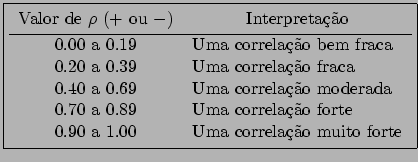

<h2> P-Valor:<h2>

Escolhemos um nível de significância de 0,05, o que significa que temos 95% de confiança de que a correlação entre as variáveis ​​é significativa.

<h3> RK vs. NOTA </h3>

---



In [ ]:
#1. Criando dataset sem valores NULL na coluna Nota_Label

Nota_Label_sem_null = df.dropna(subset=['Nota_Label'])

In [ ]:
#1.1 Verificando correlação

Nota_Label_sem_null[['rk','Nota_Label']].corr()


,rk,Nota_Label
rk,1.00000,-0.13758
Nota_Label,-0.13758,1.00000


In [ ]:
#1.2 Verificando coeficiente e p - valor entre Steps e Nota

pearson_coef, p_value = stats.pearsonr(Nota_Label_sem_null['rk'], Nota_Label_sem_null['Nota_Label'])
print('O coeficiente de correlação é = ', pearson_coef, 'e o P-valor é = ', p_value)

NameError: ignored

<h4>Conclusão:</h4>

<p> Como o valor-p é < 0,001, a correlação entre RK  e LABEL é estatisticamente significativa, mas a relação linear é fraca (~0,14).

---



<h3> ERRO vs. NOTA </h3>

---



In [ ]:
#2.Criando dataset de interações com erro

Nota_Label_POST_sem_null = df.dropna(subset=['Nota_Label_post']) #1 excluindo linhas sem avaliação

In [ ]:
#2.1.1 Verificando coeficiente e p - valor entre Steps e Nota entre Erro e Nota

pearson_coef_err2, p_value_err2 = stats.pearsonr(Nota_Label_POST_sem_null['msg_err'], Nota_Label_POST_sem_null['Nota_Label_post'])
print('O coeficiente de correlação é = ', pearson_coef_err2, 'e o P-valor é = ', p_value_err2)

<h4>Conclusão:</h4>

<p> Como o valor-p é < 0,5, a correlação entre ERRO e LABEL é estatisticamente significativa, mas a relação linear é fraca (~0,23).

---



<h2> Teste qui² <h2>

In [ ]:
# Criando cross tab

ctab = pd.crosstab(df['Label_post'],df['msg_err'])

In [ ]:
ctab

In [ ]:
chi,p,dof,exp = stats.chi2_contingency(ctab)

In [ ]:
print(p,exp)

# ANÁLISE EXPLORATÓRIA: INTERNET E CONTA




In [ ]:
df.columns

In [ ]:
# 0. CRIANDO DATASET INTERNET E CONTAS

df_internet= df[df['intent_new']=='intent.internet.check']
df_contas= df[df['intent_new']=='intent.billing.check']

In [ ]:
# RETIRANDO A LABEL 'TEXTO LIVRE' DOS DATASETS 

df_intern_sem_TextoLivre  = df_internet[df_internet['label']!= 'Texto Livre'] ##Filtrando Dataset INTERNET
df_contas_sem_TextoLivre  = df_contas[df_contas['label']!= 'Texto Livre'] ##Filtrando Dataset CONTAS

<H2> INTERNET <H2>

In [ ]:
# VERIFICANDO QUANTIDADE DE NOTAS

pd.DataFrame({'Nota':df_intern_sem_TextoLivre['label'].value_counts(),
                      '%T':round(df_intern_sem_TextoLivre['label'].value_counts(normalize=True)*100,2)})

In [ ]:
# VERIFICANDO USUÁRIO COM MAIS AVALIAÇÃO - TOP 10 

df_intern_sem_TextoLivre.groupby(['USER_ID']).label.value_counts().sort_values(ascending = False).head(10).to_frame()

In [ ]:
# VERICANDO QUANTIDADE ERROS

pd.DataFrame({'Nota':df_internet['msg_err'].value_counts(),
                      '%T':round(df_internet['msg_err'].value_counts(normalize=True)*100,2)})

In [ ]:
# CRIANDO DATASET SÓ COM ERRO
df_internet_erro = df_internet[df_internet[['msg_err']==1]

In [ ]:
df_internet_erro_1 = df_internet_erro.dropna(subset=['Nota_Label_post'],axis=0)

In [ ]:
# FILTRANDO COLUNA LABEL_POST COM AS NOTAS

df_internet_erro_2 = df_internet_erro_1[df_internet_erro_1['Label_post']!= 'Texto Livre']

In [ ]:
# VERIFICANDO NOTAS QUANDO OCORREM O ERRO

pd.DataFrame({'Nota': df_internet_erro_2['Label_post'].value_counts(),
                        '%T':round(df_internet_erro_2['Label_post'].value_counts(normalize=True)*100,2)})

In [ ]:
pearson_coef_err2, p_value_err2 = stats.pearsonr(df_internet_erro_2['Nota_Label_post'], df_internet_erro_2['msg_err'])
print('O coeficiente de correlação é = ', pearson_coef_err2, 'e o P-valor é = ', p_value_err2)